In [348]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# Getting data from the data folder
#### Path should be specified correctly

In [349]:
df = pd.read_csv("../data/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [350]:
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [351]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Checking null values

In [352]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
# drop deck beacuse 688 values are missing

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

#### Deck column is almost empty so we will drop it
#### Age can be filled randomly using mean and standard deviation
#### Rows containing empty embarked cells can be dropped

In [353]:
df.columns.values


array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

# Importance of pclass feature in dataframe

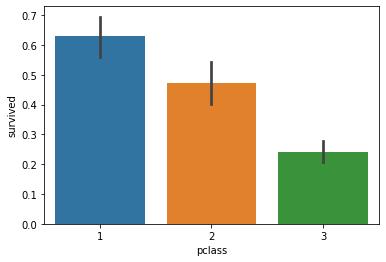

In [354]:
sns.barplot(x='pclass', y='survived', data=df)

# Importance of age in Dataframe

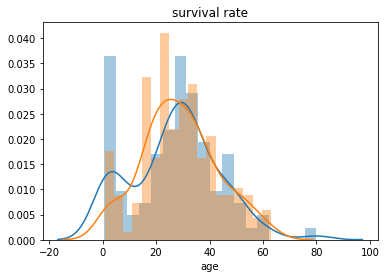

In [355]:
men = df[df['sex']=='male']
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18,label='Survived')
ax.set_title('survival rate')
women = df[df['sex']=='female']
ax2 = sns.distplot(women[women['survived']==1].age.dropna(), bins=18,label='Survived')

# Importance of Embarked feature

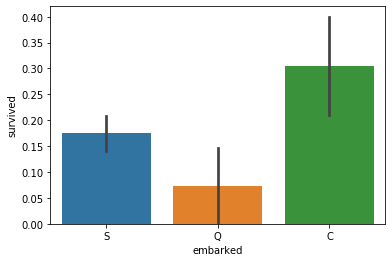

In [356]:
em = sns.barplot(x='embarked',y='survived',data=men)

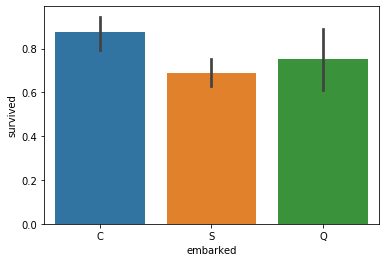

In [357]:
em2 = sns.barplot(x='embarked',y='survived',data=women)

# Made one new feature instead of having two related features

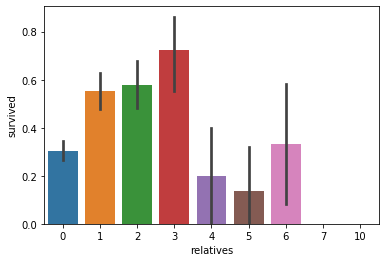

In [358]:
df['sibsp'] = df['sibsp'].astype(int)
df['parch'] = df['parch'].astype(int)

df['relatives'] = df['sibsp'] + df['parch']
plot = sns.barplot(x = 'relatives',y = 'survived',data = df)

# Dropping all the uneccessary columns

In [359]:
df = df.drop(['who','alone','alive','embark_town','adult_male','parch','sibsp','class','deck'],axis=1)

# Filling null Age cells using mean and Standard Deviation

In [360]:
for dataset in df:
    mean = df['age'].mean()
    std = df['age'].std()
    is_null = df['age'].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std,size=is_null)
    age_slice = df['age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    df['age'] = age_slice
    df['age'] = df['age'].astype(int)

In [361]:
df['embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: embarked, dtype: object

# Dropping Rows with empty Embarked cells

In [362]:
df = df.dropna()

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
survived     889 non-null int64
pclass       889 non-null int64
sex          889 non-null object
age          889 non-null int64
fare         889 non-null float64
embarked     889 non-null object
relatives    889 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


# Converting all columns to type int

In [364]:
df['fare'] = df['fare'].astype(int)

In [365]:
df.head()

,survived,pclass,sex,age,fare,embarked,relatives
0,0,3,male,22,7,S,1
1,1,1,female,38,71,C,1
2,1,3,female,26,7,S,0
3,1,1,female,35,53,S,1
4,0,3,male,35,8,S,0


In [366]:
genders = {'male':0,'female':1}
df['sex'] = df['sex'].map(genders)

In [367]:
df.head()

,survived,pclass,sex,age,fare,embarked,relatives
0,0,3,0,22,7,S,1
1,1,1,1,38,71,C,1
2,1,3,1,26,7,S,0
3,1,1,1,35,53,S,1
4,0,3,0,35,8,S,0


In [368]:
ports = {"S": 0, "C": 1, "Q": 2}
df['embarked'] = df['embarked'].map(ports)

In [369]:
df.head()

,survived,pclass,sex,age,fare,embarked,relatives
0,0,3,0,22,7,0,1
1,1,1,1,38,71,1,1
2,1,3,1,26,7,0,0
3,1,1,1,35,53,0,1
4,0,3,0,35,8,0,0


In [370]:
df['fareper'] = df['fare']/(df['relatives']+1)
df['fareper'] = df['fareper'].astype(int)
df.head()

,survived,pclass,sex,age,fare,embarked,relatives,fareper
0,0,3,0,22,7,0,1,3
1,1,1,1,38,71,1,1,35
2,1,3,1,26,7,0,0,7
3,1,1,1,35,53,0,1,26
4,0,3,0,35,8,0,0,8


# Splitting Data into train and test using scipy library

In [371]:

x = df.drop(['survived'],axis=1)
y = df['survived']

In [372]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = 2)

### 1. Logistic Regression

In [373]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred_log = logreg.predict(x_test)
acc_log = logreg.score(x_train,y_train)*100

acc_log

/home/aryaman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.09967845659163

### 2. k-nearest neighbors

In [374]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
acc_knn = knn.score(x_train,y_train)*100

acc_knn

84.72668810289389

### 3. Decision Tree

In [375]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
y_pred_tree = dec_tree.predict(x_test)
acc_tree = dec_tree.score(x_train,y_train)*100

acc_tree


97.42765273311898

In [382]:
print( 'Accuracies of the Following model are: \n' )
print('logistic regression: ' + str(accuracy_score(y_pred_log,y_test)))
print('k- Nearest Neighbors: ' + str(accuracy_score(y_pred_knn,y_test)))
print('Decision Tree: ' + str(accuracy_score(y_pred_tree,y_test)))

Accuracies of the Following model are: 

logistic regression: 0.8389513108614233
k- Nearest Neighbors: 0.6928838951310862
Decision Tree: 0.797752808988764
